# FCSC 2023 - PRECHALL WRITEUP

It is said on the website of the FCSC that there is a prechallenge

After some research on the website of the prechallenge, analysing network (events, requests) and reading the code of every page, we don't find anything

By adding "teasing" to the root link of the website of the challenge we land on the page of the statement

https://france-cybersecurity-challenge.fr/teasing

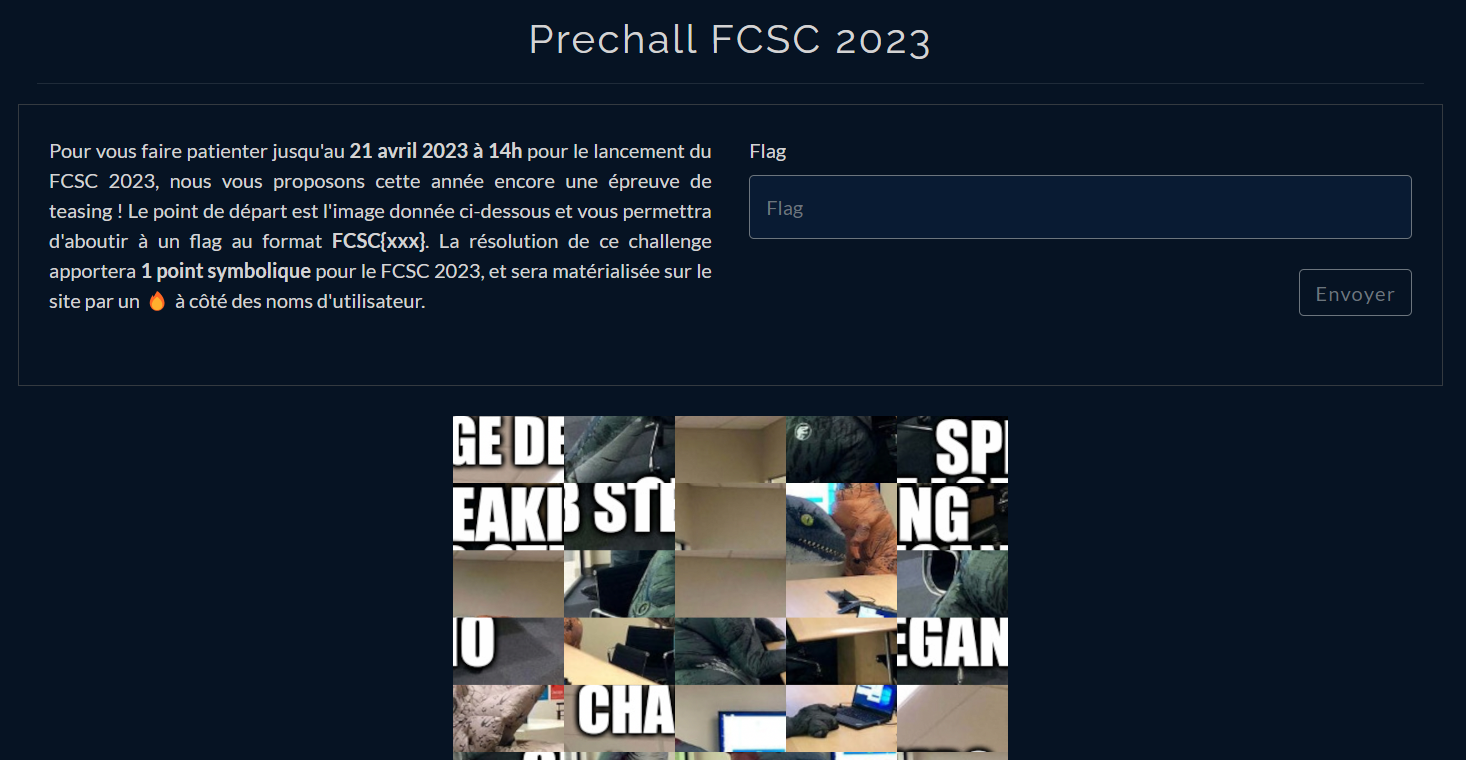

In [2]:
from IPython.display import Image
Image(filename='prechall_statement.png') 

We have the following puzzle image

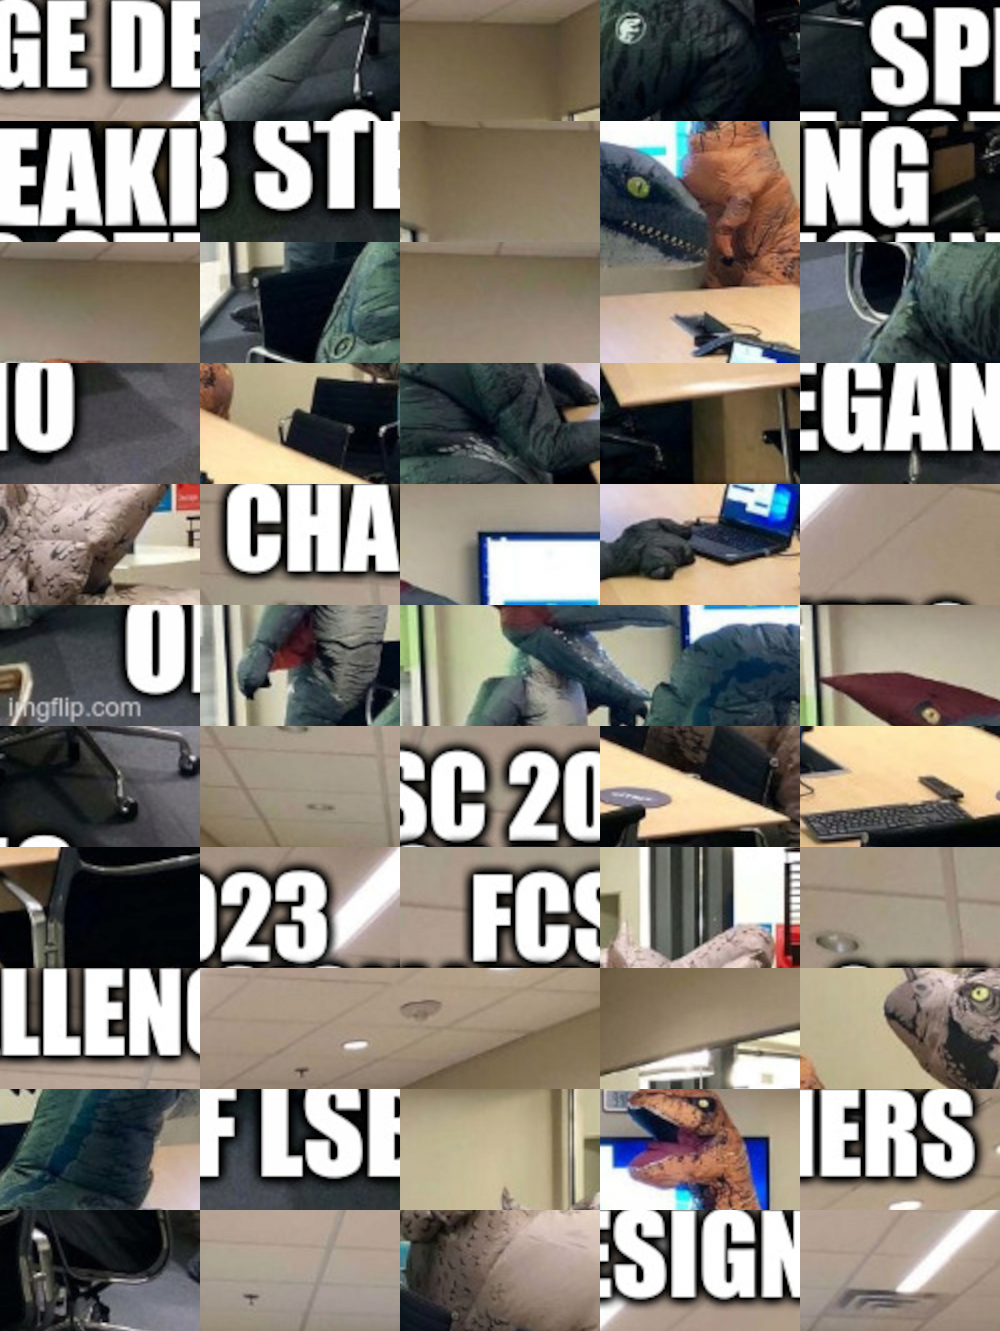

In [3]:
Image(filename='teaser.png') 

We should solve the puzzle

I begin solving it using paint in order to read what it said

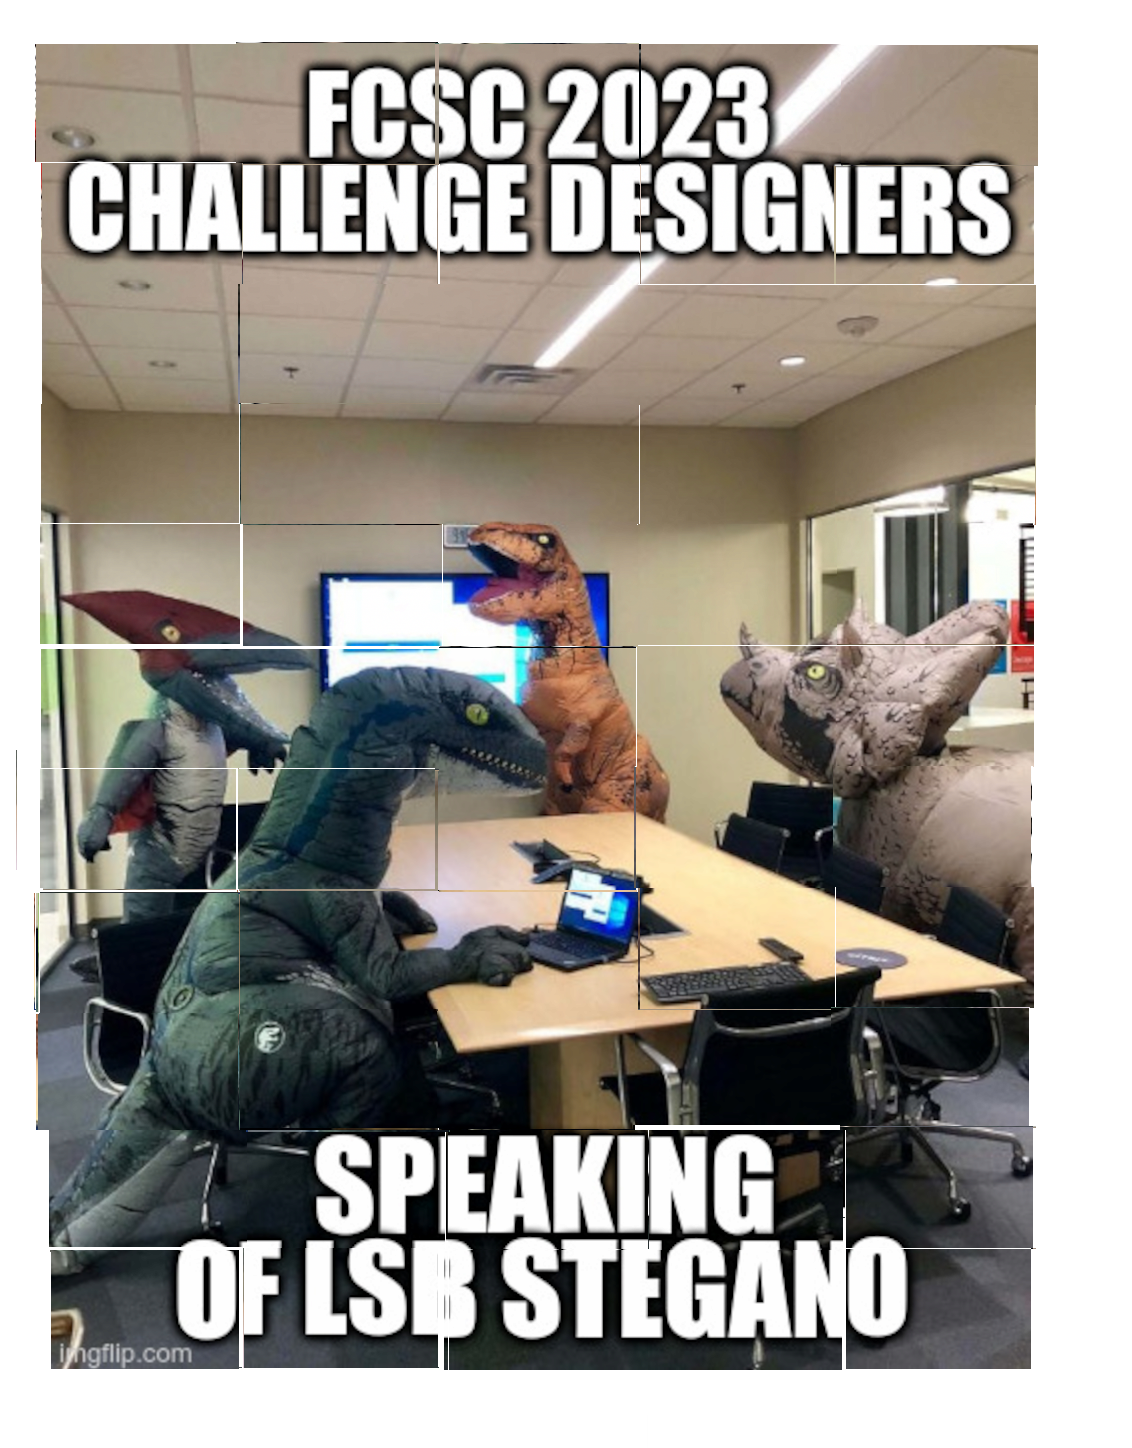

In [4]:
Image(filename='teaser_solved_manually.png') 

The image mentions "LSB" stegano which is a method of hiding information within an image by modifying the least significant bits (LSBs) of the pixels.

Solving the puzzle manyally was not a good idea, because we need to keep all the pixels of the original image

I made the following code that divides the image into 5 small images horizontally and 11 vertically

In [11]:
from PIL import Image
def cropImage() :
    im = Image.open(r"teaser.png") 
    for i in range (0, 1331, 121) : 
        for j in range (0, 1000, 200) :
            im1 = im.crop((j, i, j+200, i+121))
            im1.save("cropped_images_step1/image_"+str(i)+"_"+str(j)+".png")
cropImage()

We reorder the images in another repository (cropped_images_in_order_step1) by renaming them from 1 to 56

In [13]:
newImage = Image.new("RGB", (1000, 1331), (0,0,0,0))
k=1
while k <= 55 :
    for i in range (0, 1331, 121) : 
        for j in range (0, 1000, 200) :
            im = Image.open("cropped_images_in_order_step1/"+str(k)+".png") 
            newImage.paste(im, (j, i))
            k+=1
newImage.save("teaser_solved_automated.png")

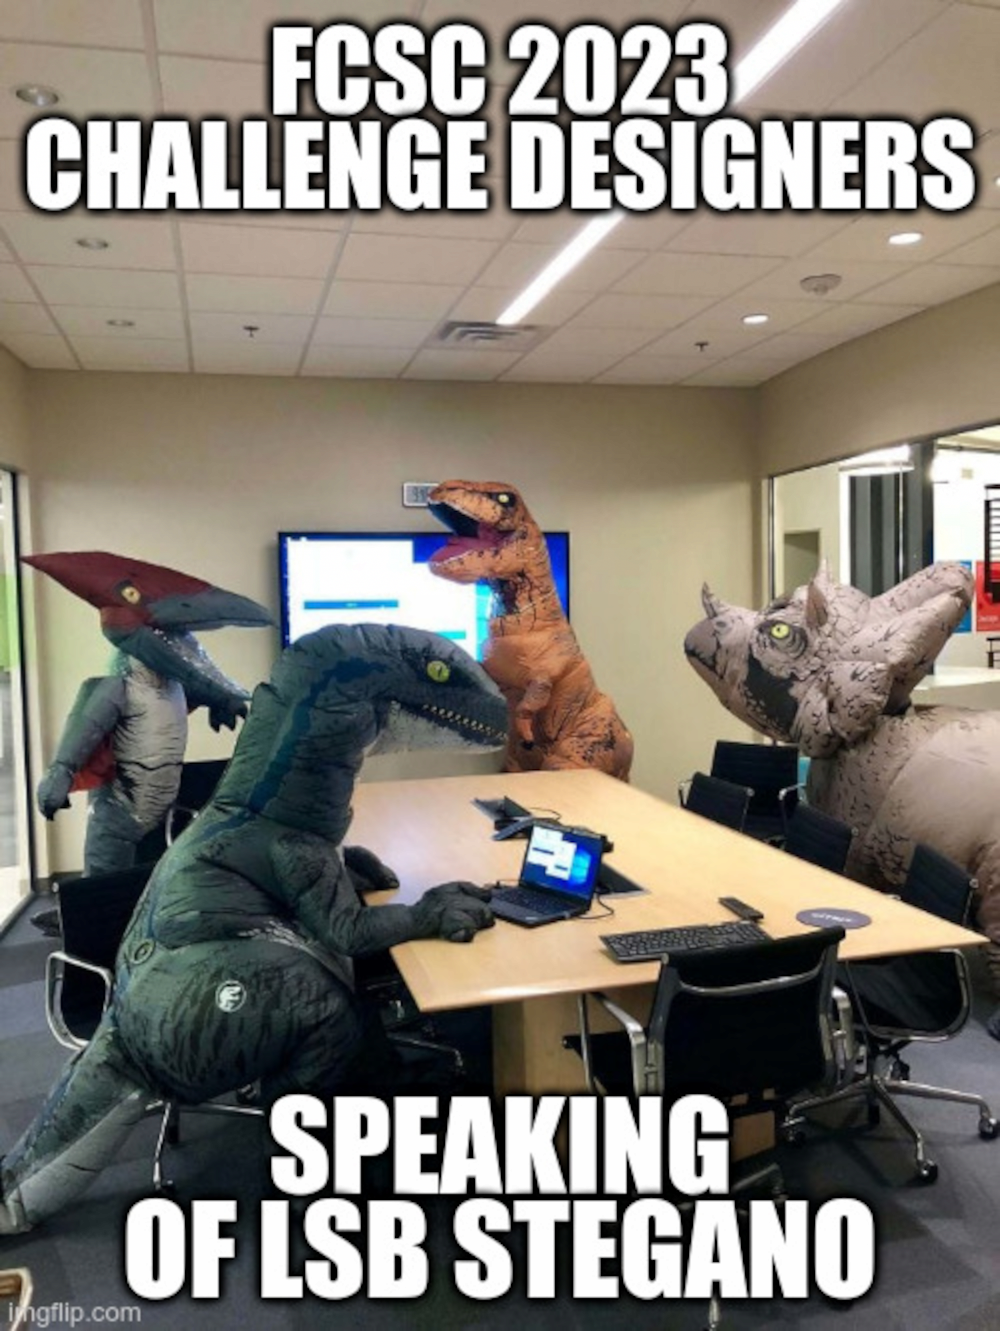

In [14]:
from IPython.display import Image
Image(filename='teaser_solved_automated.png') 

Now that we have our image in order, we can search an LSB stegano algorithm, ask Chat GPT 3 :p

Or use an online tool that can do the job for you

We can use the following website : https://stegonline.georgeom.net/upload

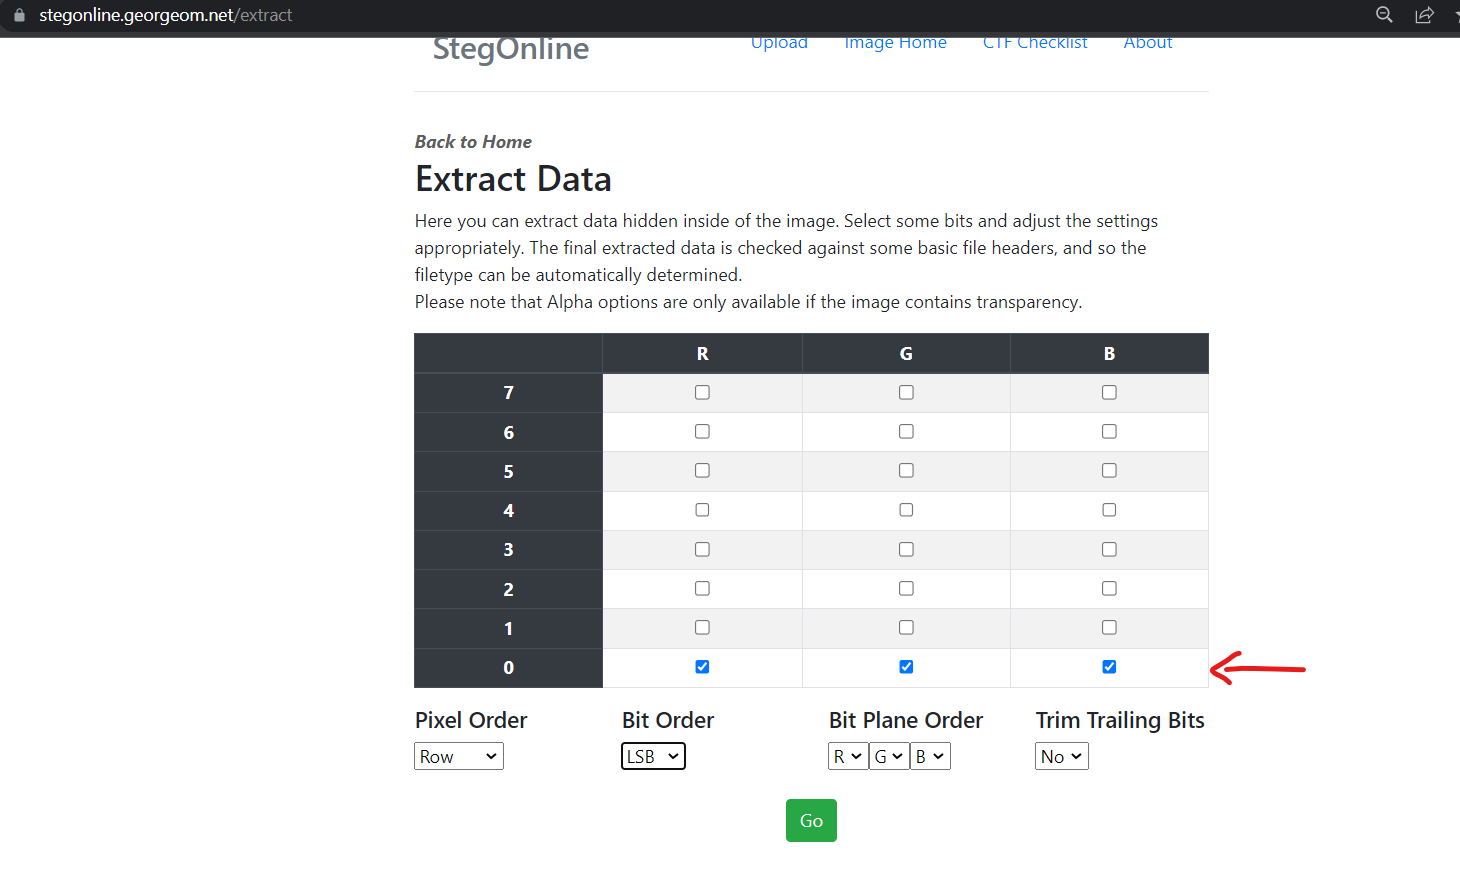

In [6]:
Image(filename='stegano_online_screenshot.png') 

We have as a result another image puzzle to solve !

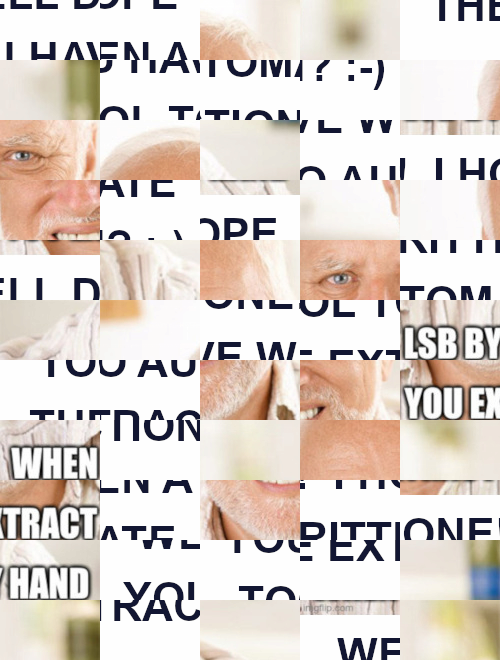

In [7]:
Image(filename='teaser_puzzle_step2.png') 

For the memes lovers, we can easily recognize the smilying old man meme

We do the same as before, we solve the puzzle

In [17]:
from PIL import Image
def cropImage() :
    im = Image.open(r"teaser_puzzle_step2.png") 
    for i in range (0, 660, 60) : 
        for j in range (0, 500, 100) :
            im1 = im.crop((j, i, j+100, i+60))
            im1.save("cropped_images_step2/image_"+str(i)+"_"+str(j)+".png")
cropImage()

In [19]:
newImage = Image.new("RGB", (500, 660), (0,0,0,0))
k=1
while k <= 55 :
    for i in range (0, 660, 60) : 
        for j in range (0, 500, 100) :
            im = Image.open("cropped_images_in_order_step2/"+str(k)+".png") 
            newImage.paste(im, (j, i))
            k+=1
newImage.save("teaser_solved_automated_step2.png")

The result is the following image

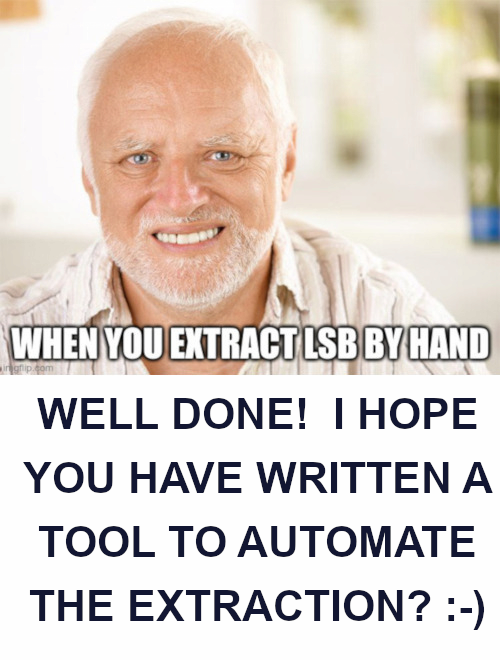

In [15]:
from IPython.display import Image
Image(filename='teaser_solved_automated_step2.png') 

We do the same as before, we see if this photo is hiding some information using LSB stegano reverse algorithme or using the online tool

As expected something was hidden in the image, we have an ELF file ==> teaser_solved_automated_step2.elf

We can try to open the file with Notepad++ and search for some keywords like "FCSC"

We can also try to run the elf file using gdb commands (run, info functions, info registers, ...)

After several attempts, it looks like it's an assembly code, so we can try to force values on registers, but that doesn't lead to any good results.

We can use a tool to convert the assembly code to pseudo code. IDA is good tool for that

#### Pseudo code

IDA pseudo code conversion feature gives us the following

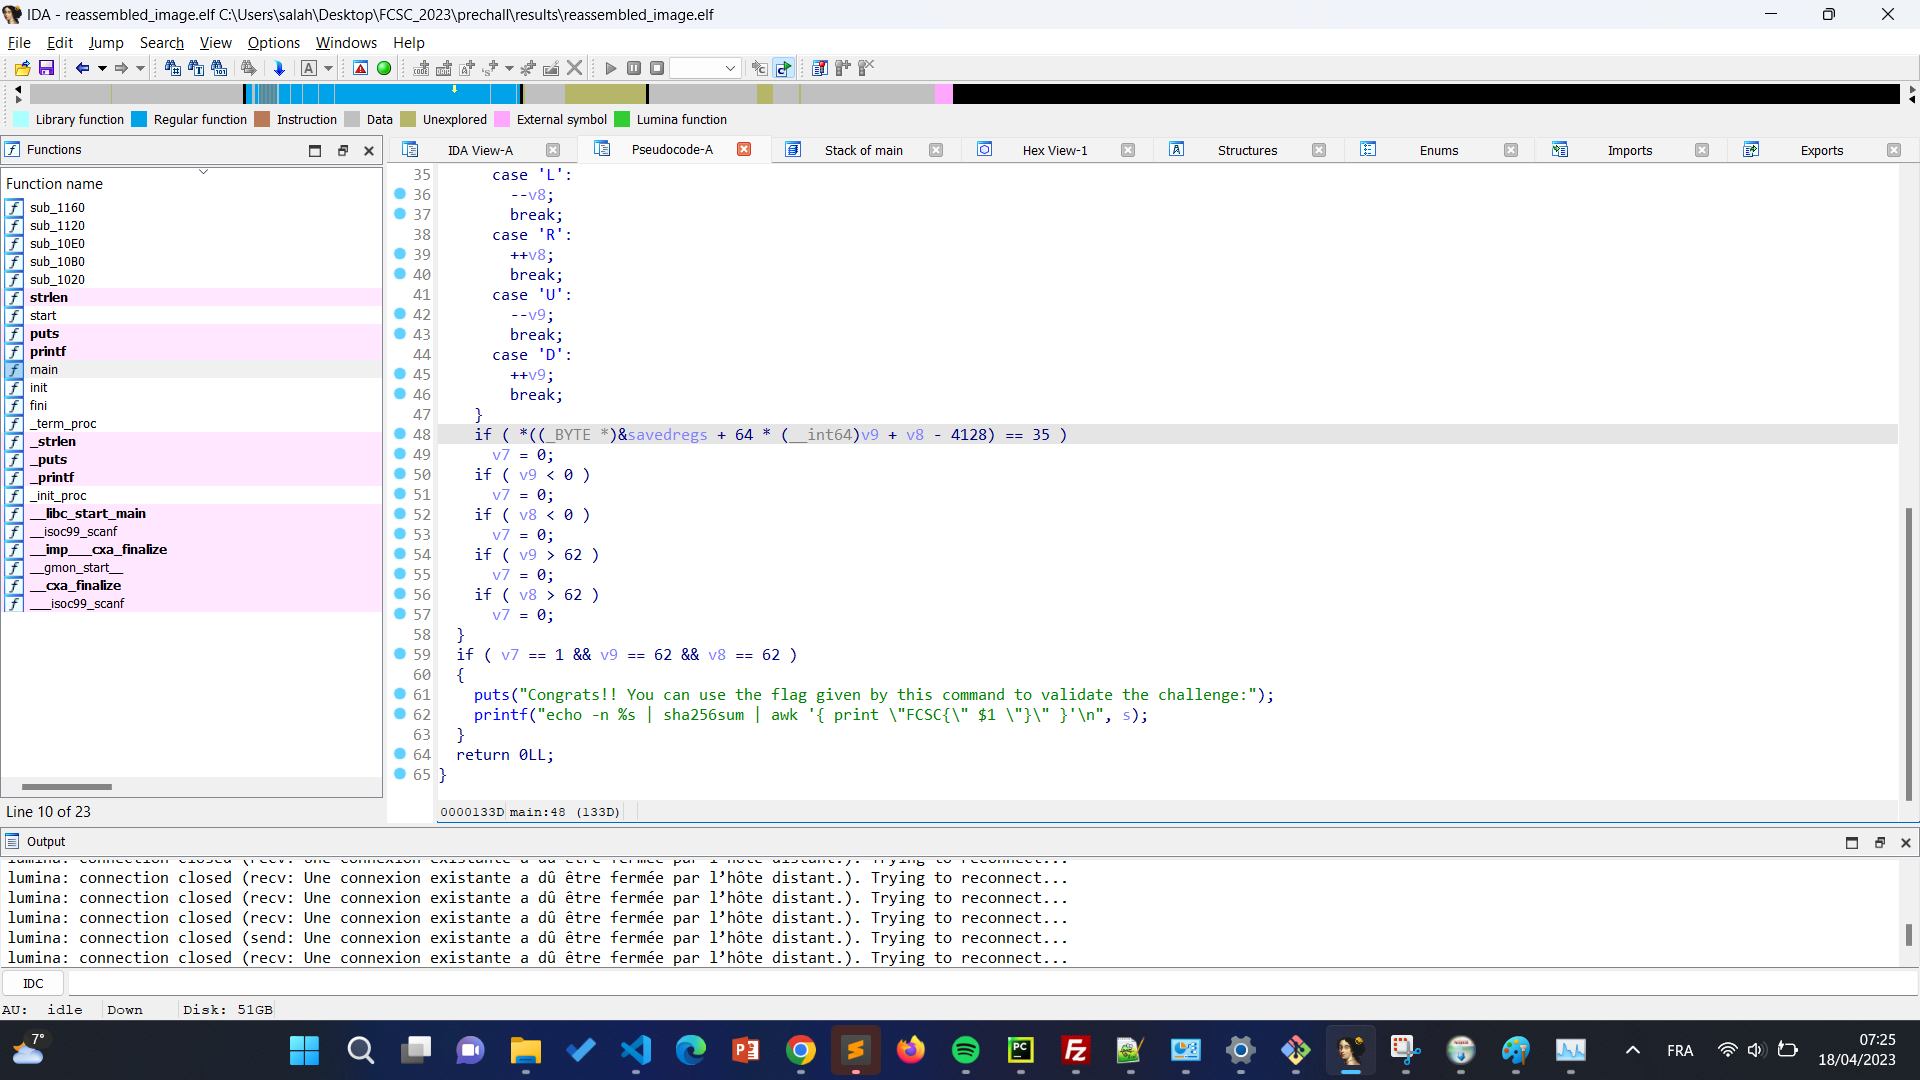

In [9]:
Image(filename='IDA_Screenshot.png') 

We can notice that we change the values of variables v7, v8 and v9 depending on what's given to in scanf function while running the code

If we want the flag we need to verify the following condition  :

if ( v7 == 1 && v9 == 62 && v8 == 62 )
 
We can notice that this problem looks like a labyrinth intialized at the beginning

In [83]:
from PIL import Image

def isNotMine(x, y, qword_4060_dec) :
    if x<0 or x>63 or y<0 or y>64 :
        return false
    return ((qword_4060[i] >> j ) & 1 != 0)

qword_4060 = [0x7FFFFFFFFFFFFFFC, 0x4004504400511151, 0x7DD5DD5575D77D5D,
0x4554455115500451, 0x5F5D5DDD7557F5DD, 0x4105101144455045,
0x5DF77FDF77DD57F5, 0x5445104144450001, 0x75F57DFFDDD5FDFD,
0x4450400511141011, 0x775777F5DDF7DFF7, 0x4415144001104011,
0x55F55DDD577DFF57, 0x5451441555041151, 0x75D7FF57F555DDD7,
0x5454045045550401, 0x55D5FFD7DDF7DFD5, 0x4004000450015415,
0x57F7D7FF5D7775FD, 0x5545140401100115, 0x5D7DFD7FDD5DF5D5,
0x4000050145441415, 0x57DFFDFD5F777755, 0x5541441441541451,
0x55755FD57F5DFDFD, 0x5414044511444101, 0x7F7F7775F5DD5FD5,
0x4111441414155415, 0x775DF5FF57F5D7D7, 0x4441100045105015,
0x75DDD77FDDDF7F7D, 0x4045150040051005, 0x5FD555FF755D7775,
0x4114500115404141, 0x5FFDD7DF5DFDFFDD, 0x4415410545515151,
0x55F757FDFF5F5D77, 0x5151150041040451, 0x775755F555DD5D5F,
0x4415501515114515, 0x55F5F7FDF7DD5DD5, 0x5001004110054501,
0x57FDF7FFD7D7F5D7, 0x5101114041511111, 0x77FD7F5FDF5DDD77,
0x4040141045100141, 0x5FF7775F757775F5, 0x4041414414511515,
0x7DF7DF7DF757F77D, 0x5014101104411441, 0x5DFDDF57D7F77DFD,
0x5415014450411101, 0x57D5DDF77DFD77FD, 0x5001054114051105,
0x5DDF7D5557F55577, 0x4104411444444511, 0x5FFF5577DD575DFD,
0x4500541541155411, 0x755DDD7557DD7775, 0x5445111551111405,
0x577DFFD57DD7D7D7, 0x410005100405011, 0x3FFFFFFFFFFFFFFF]

qword_4060_dec = []
for qword in qword_4060 :
    qword_4060_dec.append(format(int(qword)))


labyrinthe = []
for i in range(63) :
    myList = []
    for j in range(64) :
        if isNotMine(i, j, qword_4060_dec):
            myList.append(".")
        else :
            myList.append("#")
    labyrinthe.append(myList)



print("Colonnes :",len(labyrinthe[0]))
print("Lignes : ",len(labyrinthe))

moveDim = 50
newImage = Image.new("RGB", (moveDim * 64 , moveDim * 63), color="white")

for i in range(63) :
    for j in range(64) :
        if labyrinthe[i][j] == "#" :
            for k in range(moveDim) :
                for l in range(moveDim) :
                    newImage.putpixel((j*moveDim + k, i*moveDim + l), (255, 255, 255))
        elif labyrinthe[i][j] == "." :
            for k in range(moveDim) :
                for l in range(moveDim) :
                    newImage.putpixel((j*moveDim + k, i*moveDim + l), (0, 0, 0))
newImage.save("labyrinth.png")

Colonnes : 64
Lignes :  63


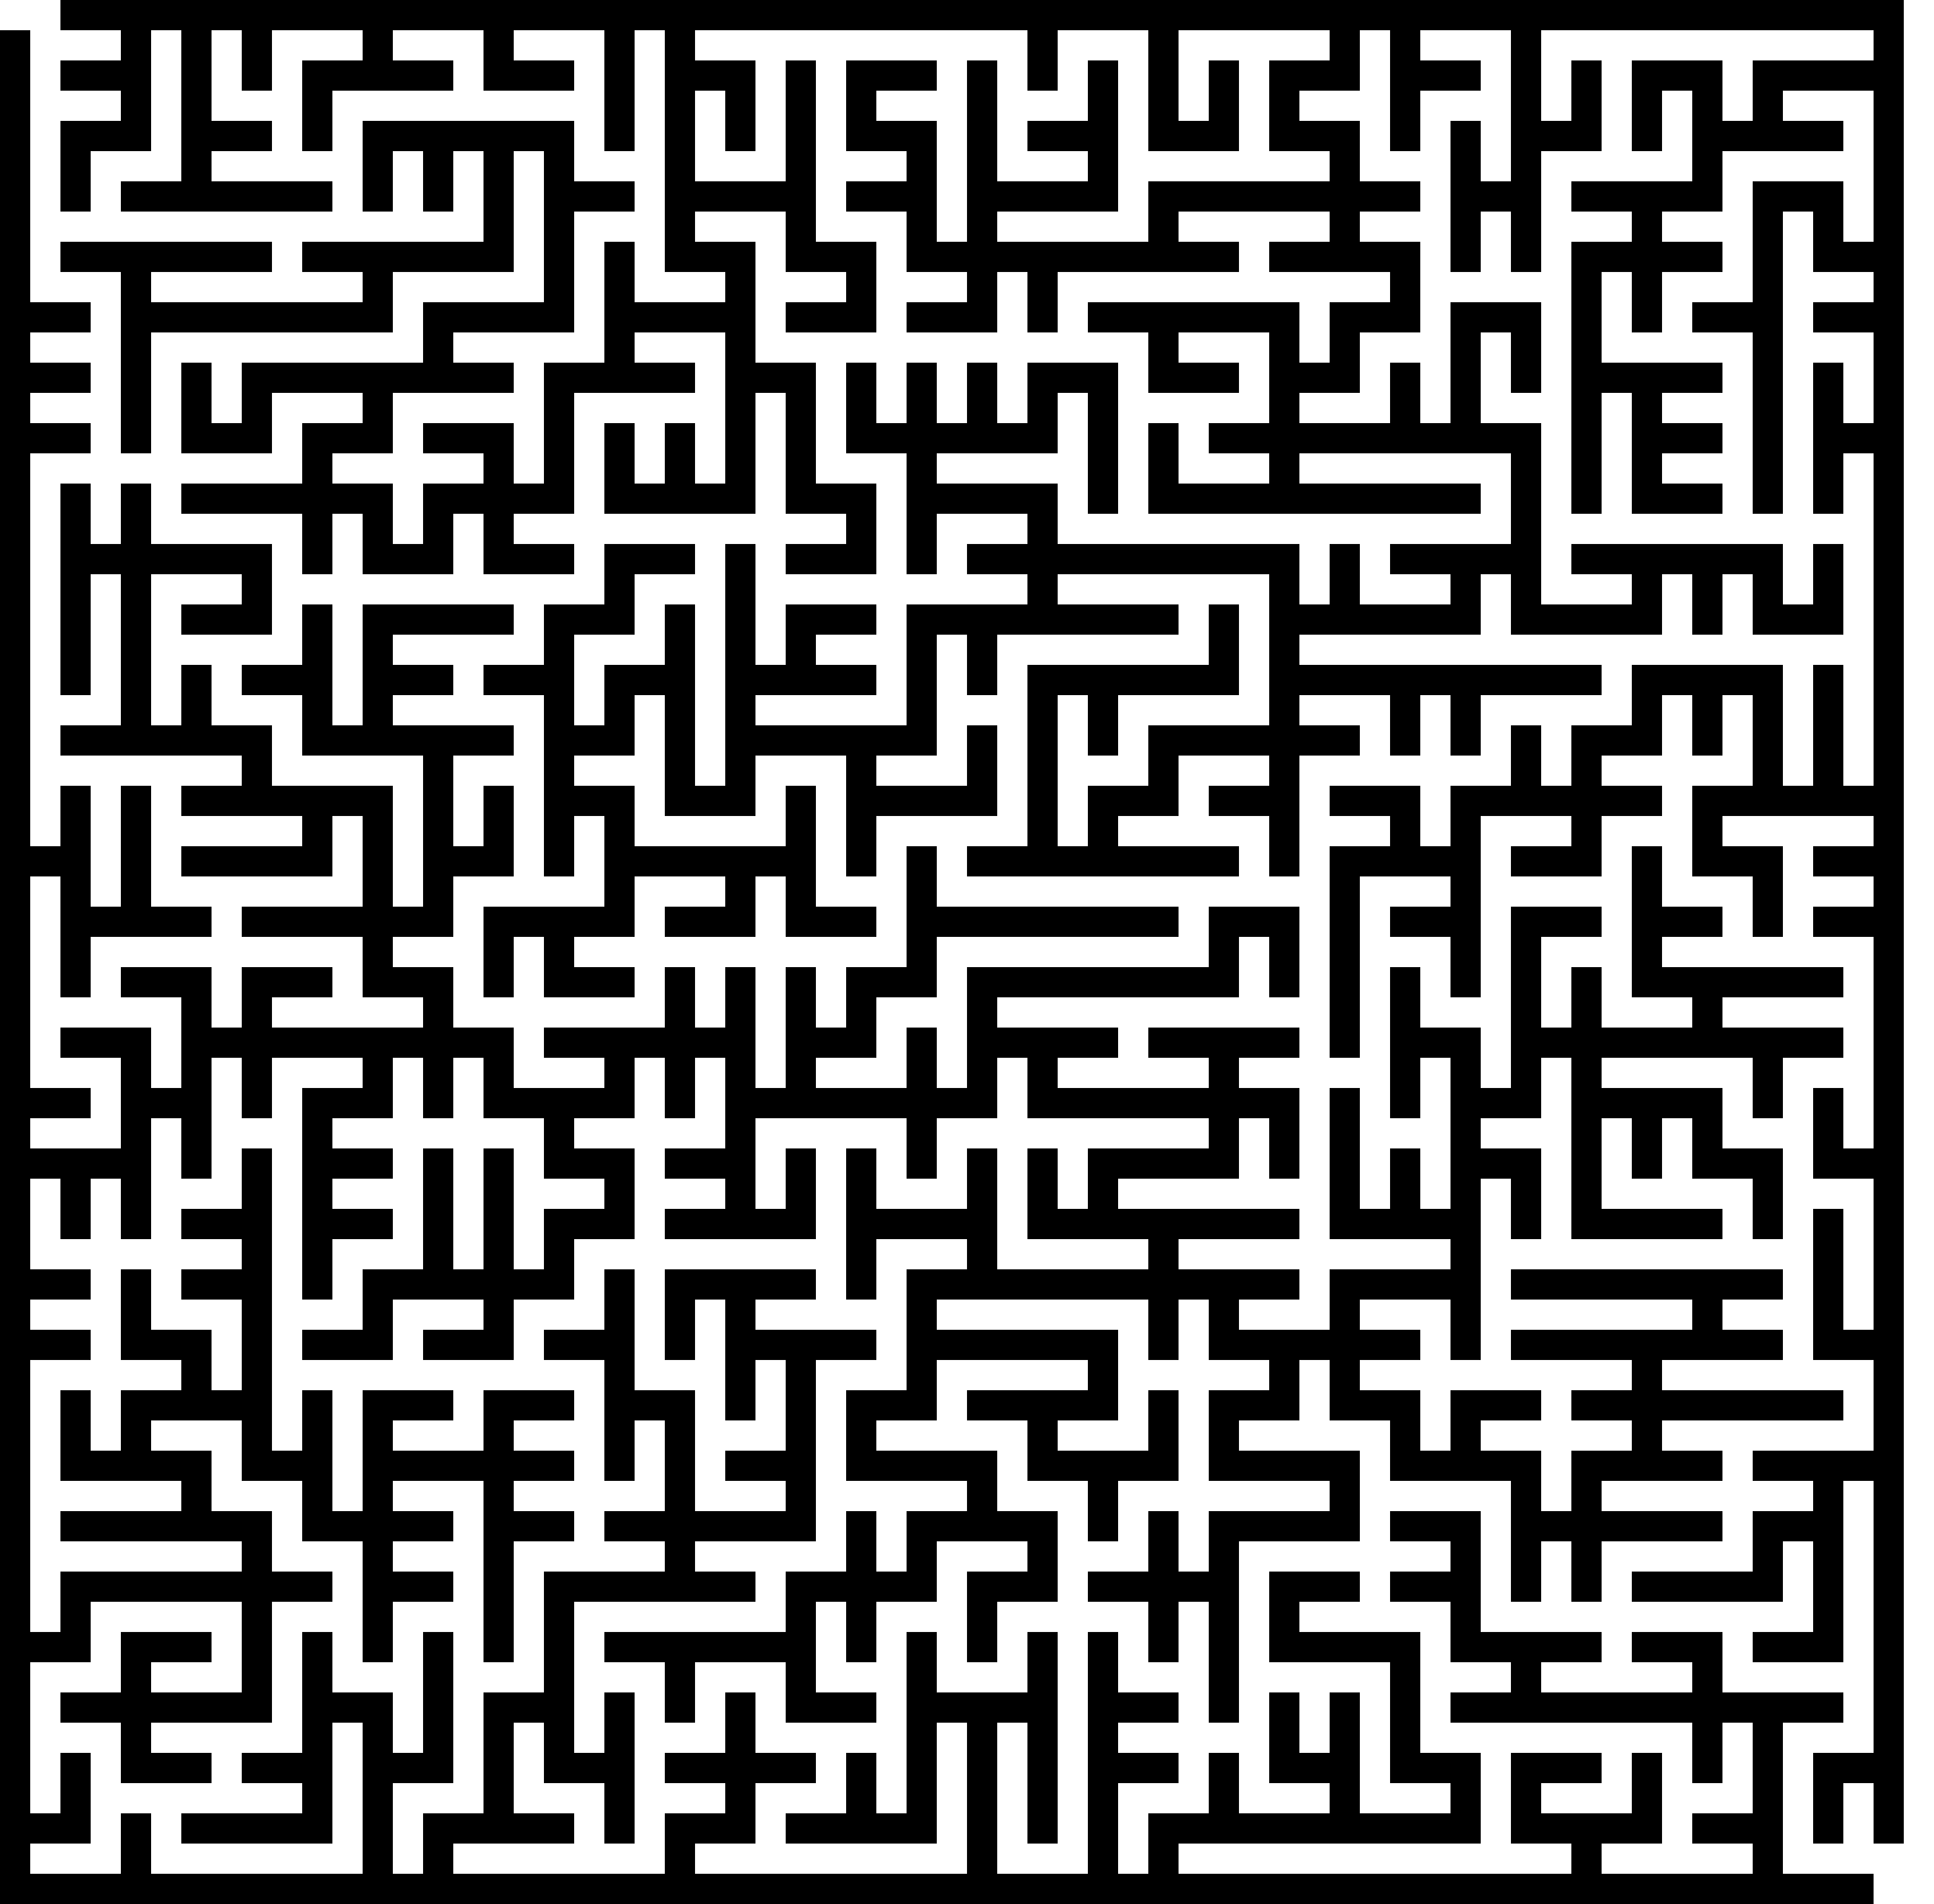

In [16]:
from IPython.display import Image
Image(filename='labyrinth.png') 

Now that we have the labyrinth, we can solve it by beginning at (0,0) and noting the move we did.

We can find an algorithmic solution too

Here is the sequence of moves we should make :

In [70]:
moves = "RDDDDDDDDDRRDDDDDDRRDDRRRRDDRRRRRRRRDDLLDDRRDDDDDDLLDDDDRRRRRRUURRRRRRRRUUUURRDDRRRRRRRRRRRRDDDDDDRRUUUURRDDRRUUUURRRRUURRDDRRDDRRRRDDDDLLDDDDDDDDDDRRDDLLLLDDDDLLLLDDRRRRDDRRRRDDLLDDDDRRRDR"

We can also make a check that v8 and v9 are equal to 62

In [73]:
def check(moves) :
    v8 = 0
    v9 = 0
    
    for i in range(1, len(moves)) :
        c = moves[i]
        if c == "L" :
            v8 -= 1
        elif c == "R" :
            v8 += 1
        elif c == "U" :
            v9 -= 1
        elif c == "D" :
            v9 += 1
    if v8 == 62 and v9 == 62 : 
        print((v8,v9))
        return True
    return False
check(moves)

(62, 62)


True

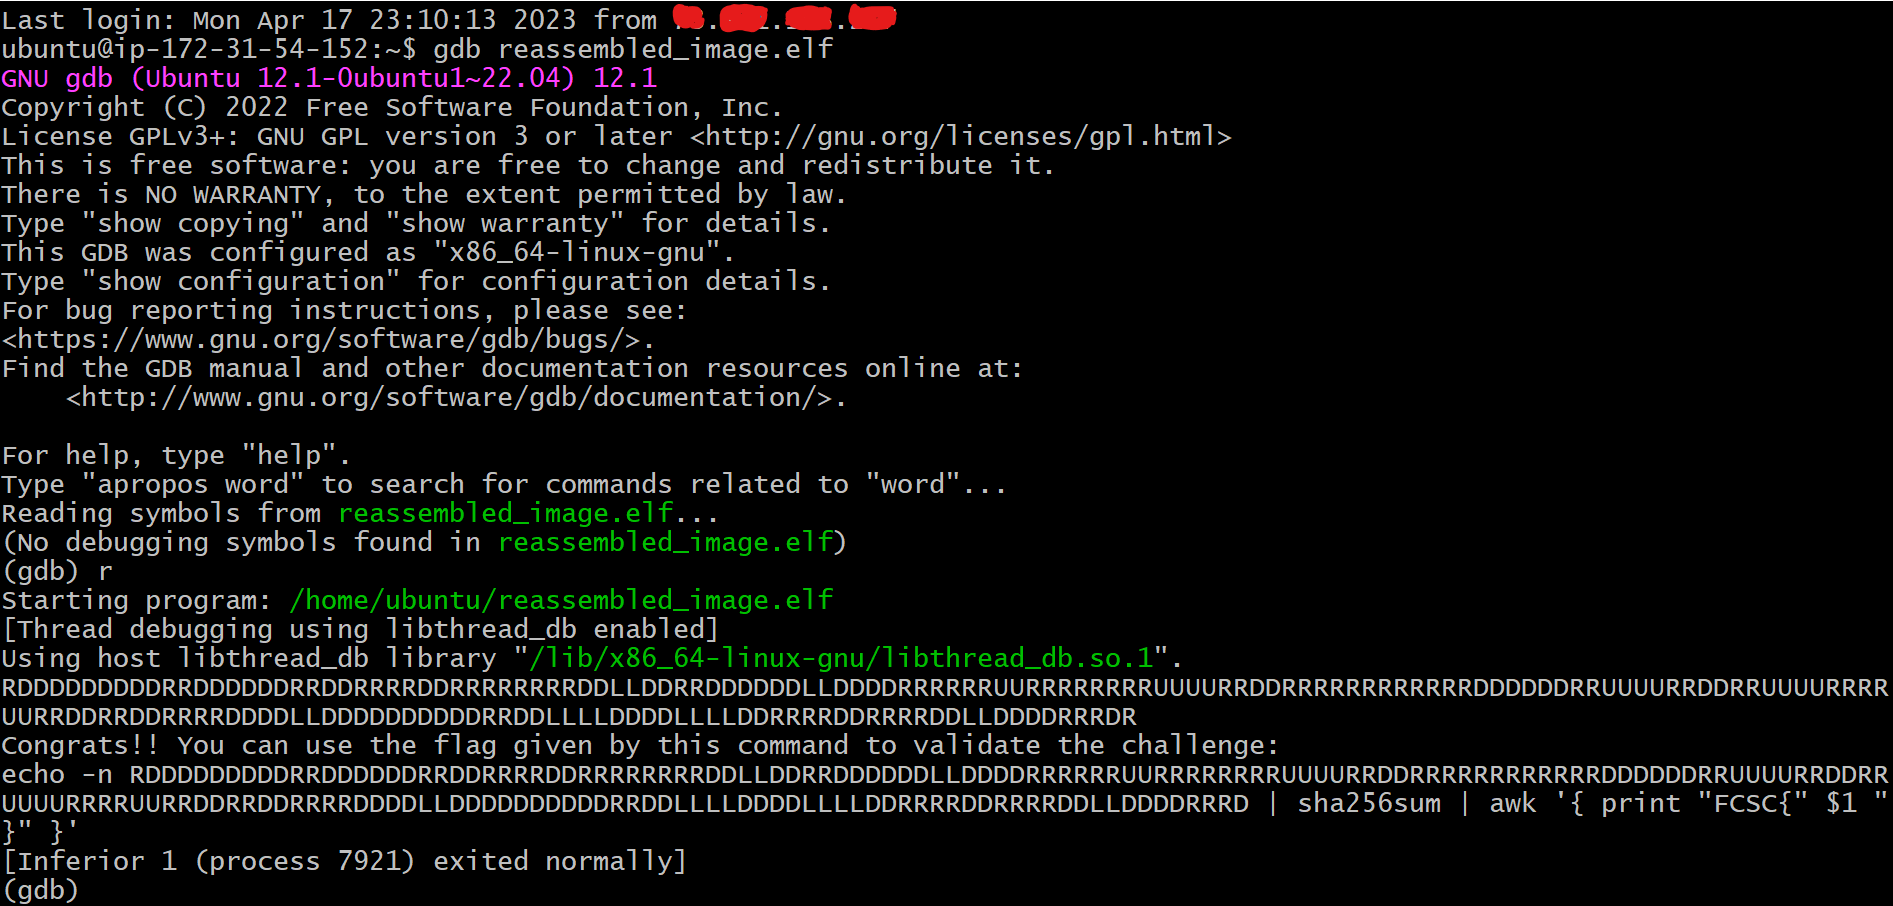

In [11]:
Image(filename='solution1.png') 

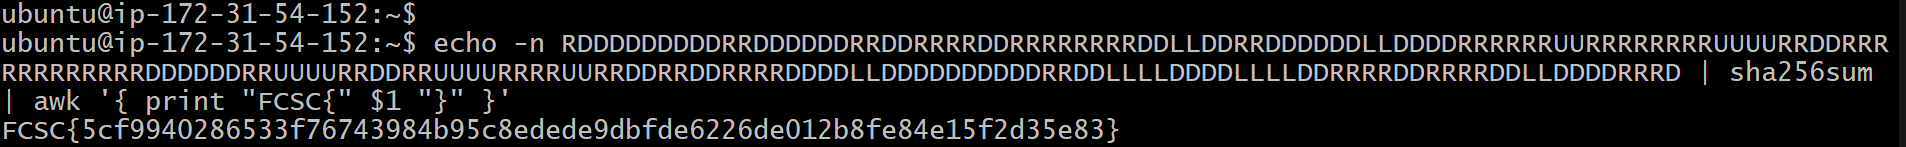

In [12]:
Image(filename='solution2.png') 

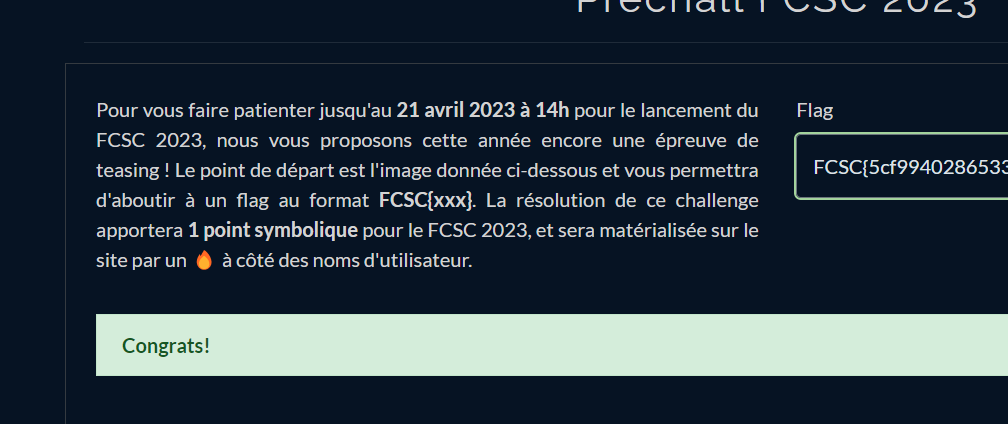

In [13]:
Image(filename='congrats.png') 